### Import Libraries and Load Data
In this step, we import the necessary libraries for data manipulation, visualization, and machine learning. We also load the dataset from a CSV file into a pandas DataFrame.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


path = "/housing.csv"
data = pd.read_csv(path)

### Data Overview
Here, we take a first look at the dataset using `data` to display a few rows and `info()` to get a concise summary of the DataFrame, including the data types and non-null values of each column.


In [3]:
# optional : look at the data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# optional : look at info of data
data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

### Data Cleaning
We drop any rows with missing values to ensure that our model training is not affected by NaN values.

In [5]:
# Drop rows with missing values and save the cleaned data
data.dropna(inplace = True)

### Feature and Target Separation
We separate the features (independent variables) from the target variable (`median_house_value`) which we aim to predict.


In [6]:

# we'll drop the following cariables for the training
X =  data.drop(['median_house_value'], axis =1)
y =  data['median_house_value']
# optional : print X and y

### Train-Test Split
We split the data into training and testing sets using an 80-20 split. This helps in evaluating the model's performance on unseen data.


In [7]:
# using sklearn: 
# auto split the data, the test size is 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Feature Engineering
We combine the training features and target variable into one DataFrame and apply a log transformation to reduce the skewness of some features, making them more normally distributed.


In [8]:
# Features Engineering :
# combinding the train data of X and y to a join train data
# we'll take the log of the following variables
train_data = X_train.join(y_train)

def featuresEngineering (train_data,X_train,y_train):
    train_data = X_train.join(y_train)
    train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
    train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
    train_data['population'] = np.log(train_data['population'] +1)
    train_data['households'] = np.log(train_data['households'] +1)
    return train_data

train_data= featuresEngineering(train_data,X_train,y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6120,-117.91,34.12,41.0,7.891331,6.361302,7.723120,6.385194,3.7846,<1H OCEAN,145500.0
6082,-117.87,34.09,31.0,7.303170,5.793014,6.833032,5.762051,3.6484,<1H OCEAN,189600.0
15467,-117.21,33.19,21.0,8.233769,6.418365,7.451822,6.386879,4.8152,<1H OCEAN,218500.0
19118,-122.65,38.23,52.0,7.562162,5.976351,6.814543,5.846439,3.4500,<1H OCEAN,200600.0
15556,-117.07,33.12,21.0,8.429236,6.833032,7.944137,6.803505,3.1458,<1H OCEAN,187700.0
...,...,...,...,...,...,...,...,...,...,...
872,-122.02,37.56,23.0,8.374015,6.754604,7.808729,6.721426,4.3594,NEAR BAY,223400.0
8276,-118.16,33.78,39.0,8.312871,6.990257,7.812378,6.933423,2.3317,NEAR OCEAN,222500.0
16966,-122.31,37.55,27.0,8.276903,6.839476,7.537963,6.747587,3.9722,NEAR OCEAN,354100.0
6105,-117.89,34.12,35.0,7.356918,5.774552,7.242082,5.762051,4.0500,<1H OCEAN,141300.0


### Data Visualization: Histograms
We visualize the distributions of the features in the training data using histograms to understand the spread and skewness of the data.


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

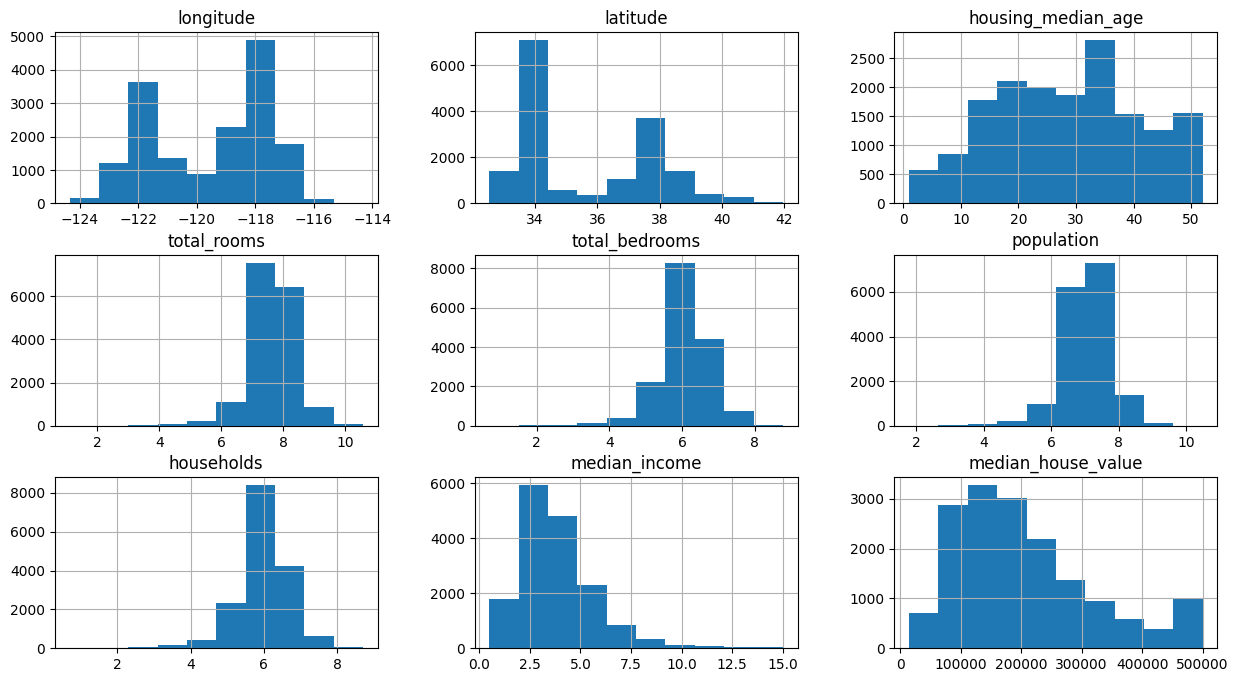

In [9]:
# view a histogram
train_data.hist(figsize=(15,8))

### Correlation Matrix
We visualize the correlation between numeric features using a heatmap. This helps identify which features are strongly correlated with each other or the target variable.


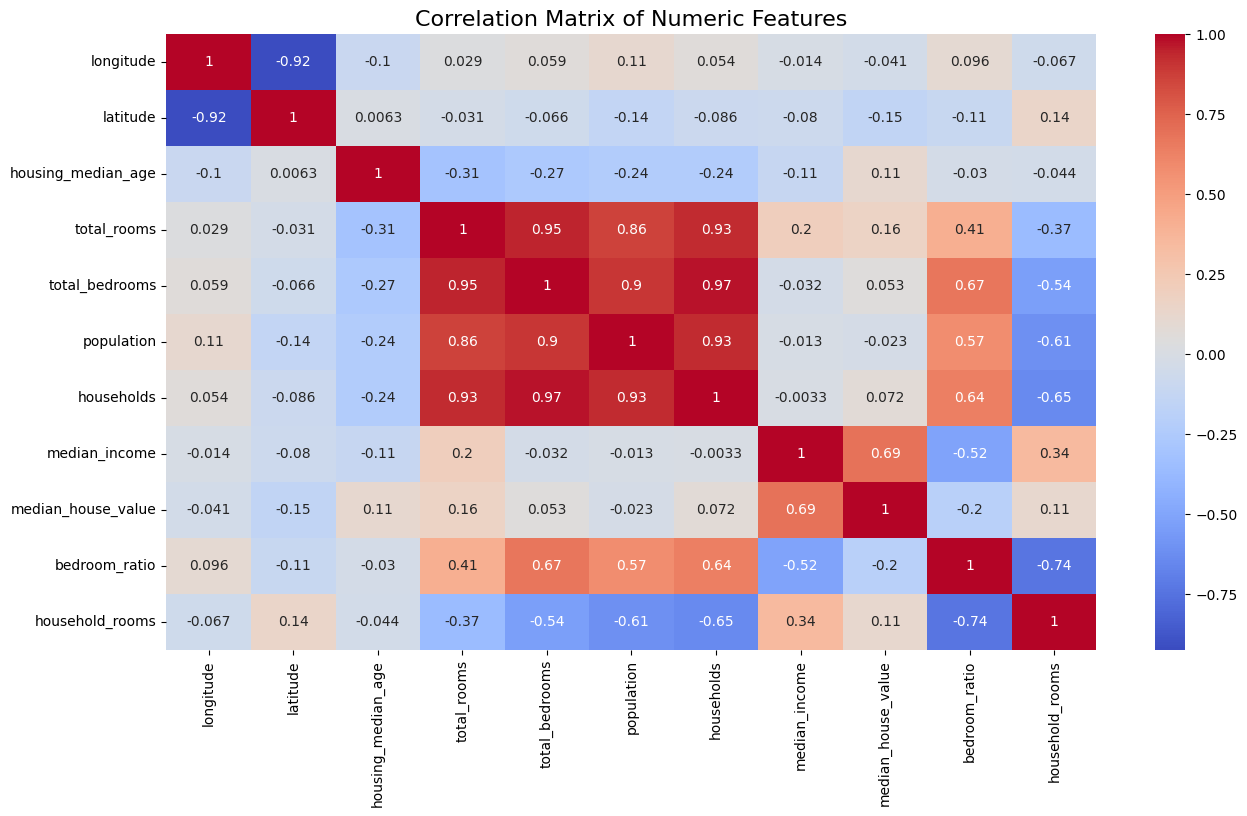

In [23]:
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=np.number)

# Visualizing a correlation matrix of the numeric data using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()


### Data Visualization: Histograms (Post-Transformation)
We visualize the distributions of the features again after log transformation to observe any changes in their distributions.


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

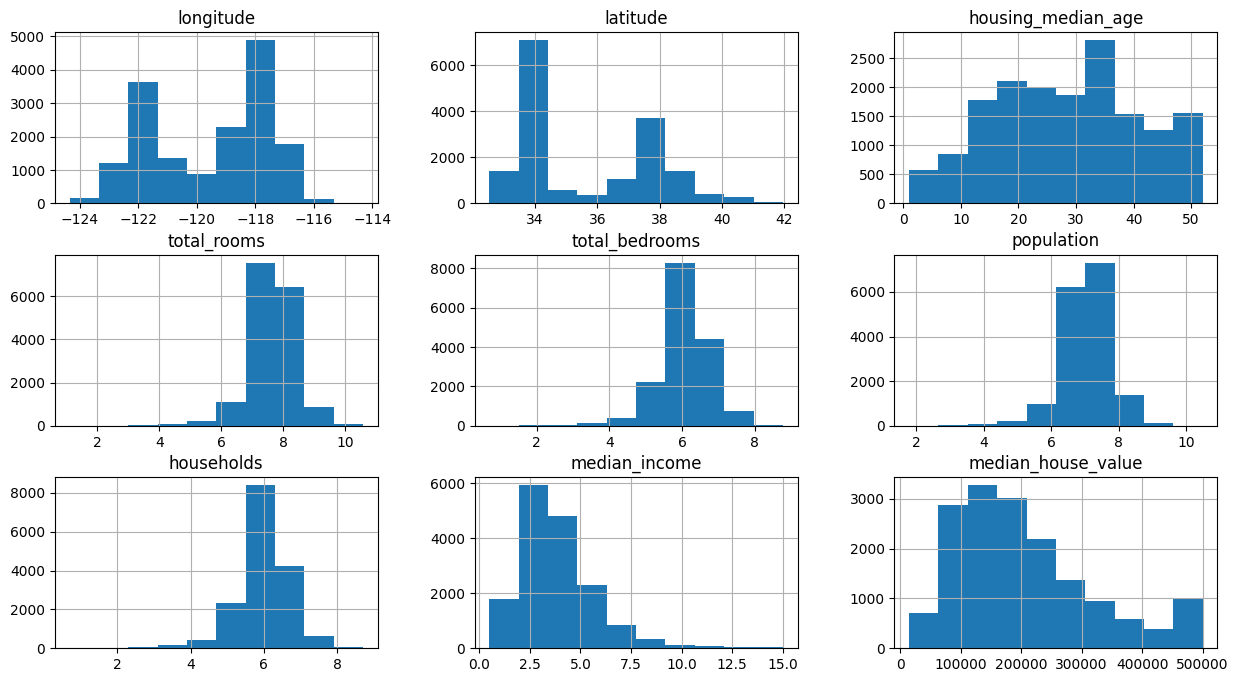

In [11]:
# view a histogram
train_data.hist(figsize=(15,8))

### Categorical Variable Encoding
We convert the `ocean_proximity` categorical variable into dummy variables (one-hot encoding) and drop the original `ocean_proximity` column.


In [12]:
# for ocean_proximity variable, we'll create dummy variable for each one
# then we repleace the ocean_proximity variable with the dummies

def replaceToDummies(train_data,variable):
    train_data=train_data.join( pd.get_dummies(train_data[variable]) ).drop([variable],axis=1)
    return train_data

train_data =replaceToDummies(train_data,'ocean_proximity')
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6120,-117.91,34.12,41.0,7.891331,6.361302,7.723120,6.385194,3.7846,145500.0,True,False,False,False,False
6082,-117.87,34.09,31.0,7.303170,5.793014,6.833032,5.762051,3.6484,189600.0,True,False,False,False,False
15467,-117.21,33.19,21.0,8.233769,6.418365,7.451822,6.386879,4.8152,218500.0,True,False,False,False,False
19118,-122.65,38.23,52.0,7.562162,5.976351,6.814543,5.846439,3.4500,200600.0,True,False,False,False,False
15556,-117.07,33.12,21.0,8.429236,6.833032,7.944137,6.803505,3.1458,187700.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,-122.02,37.56,23.0,8.374015,6.754604,7.808729,6.721426,4.3594,223400.0,False,False,False,True,False
8276,-118.16,33.78,39.0,8.312871,6.990257,7.812378,6.933423,2.3317,222500.0,False,False,False,False,True
16966,-122.31,37.55,27.0,8.276903,6.839476,7.537963,6.747587,3.9722,354100.0,False,False,False,False,True
6105,-117.89,34.12,35.0,7.356918,5.774552,7.242082,5.762051,4.0500,141300.0,True,False,False,False,False


### Correlation Matrix (Post-Encoding)
We visualize the correlation matrix again to see the impact of the newly created dummy variables on the overall data.


<Axes: >

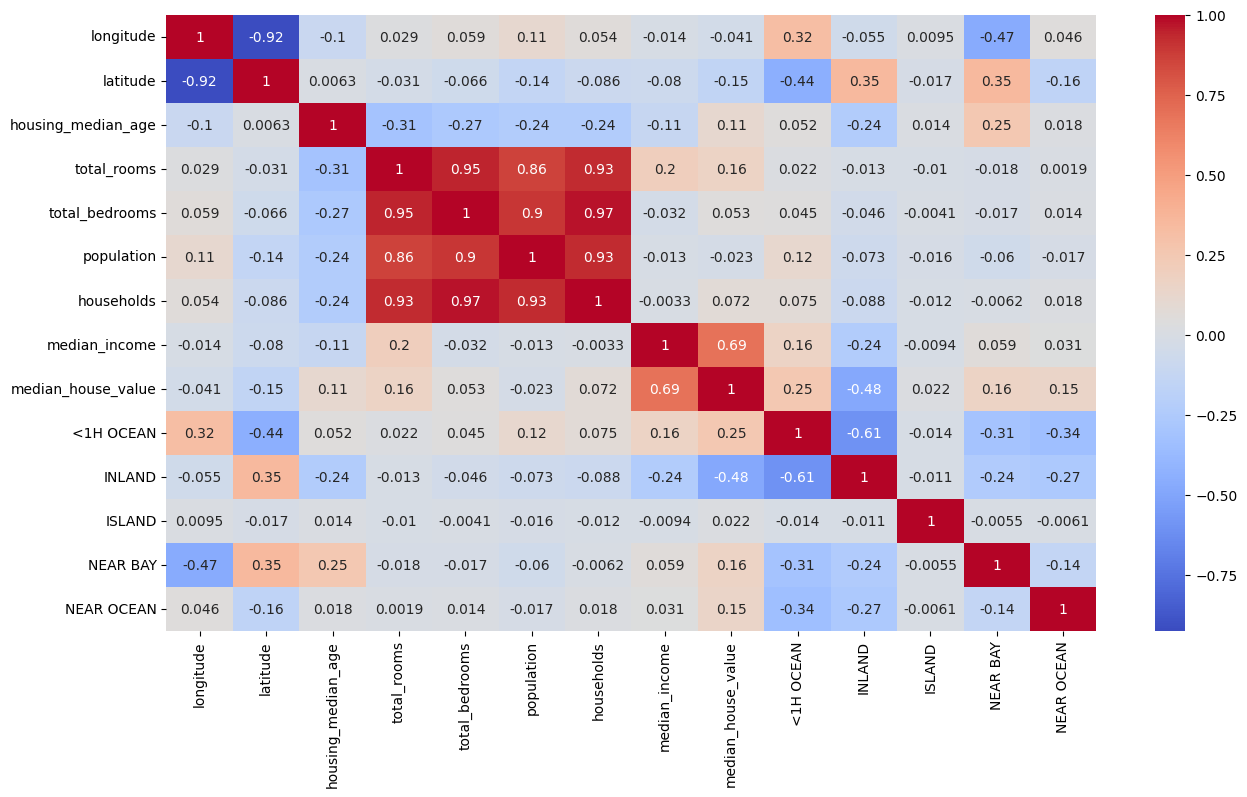

In [13]:
# Visualizing a correlation matrix of the train data using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")

### Scatter Plot: House Value by Location
We create a scatter plot to visualize the relationship between house values and their geographic coordinates (latitude and longitude).


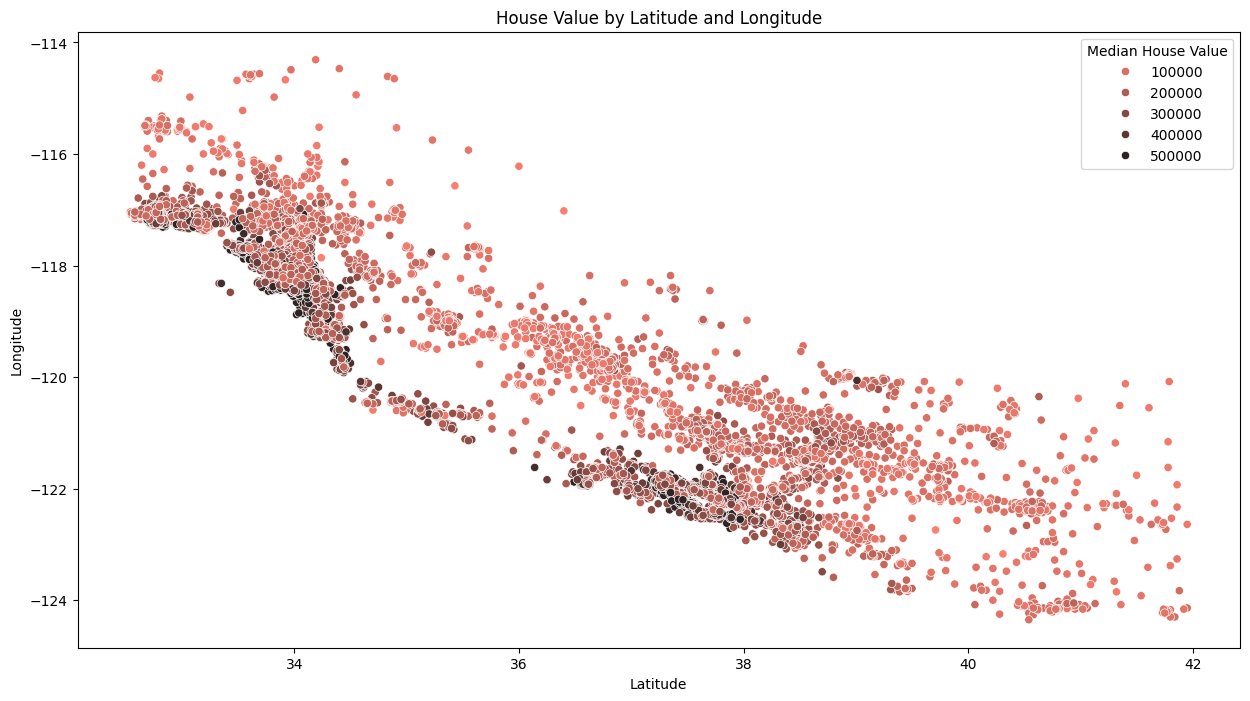

In [14]:

plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude',y = 'longitude',data =train_data,hue='median_house_value',palette='dark:salmon_r')
# Add title, axis labels, and hue legend title
plt.title('House Value by Latitude and Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Median House Value')

### Additional Feature Engineering
We create two new features: `bedroom_ratio` (ratio of bedrooms to total rooms) and `household_rooms` (average number of rooms per household). We then visualize the updated correlation matrix.


<Axes: >

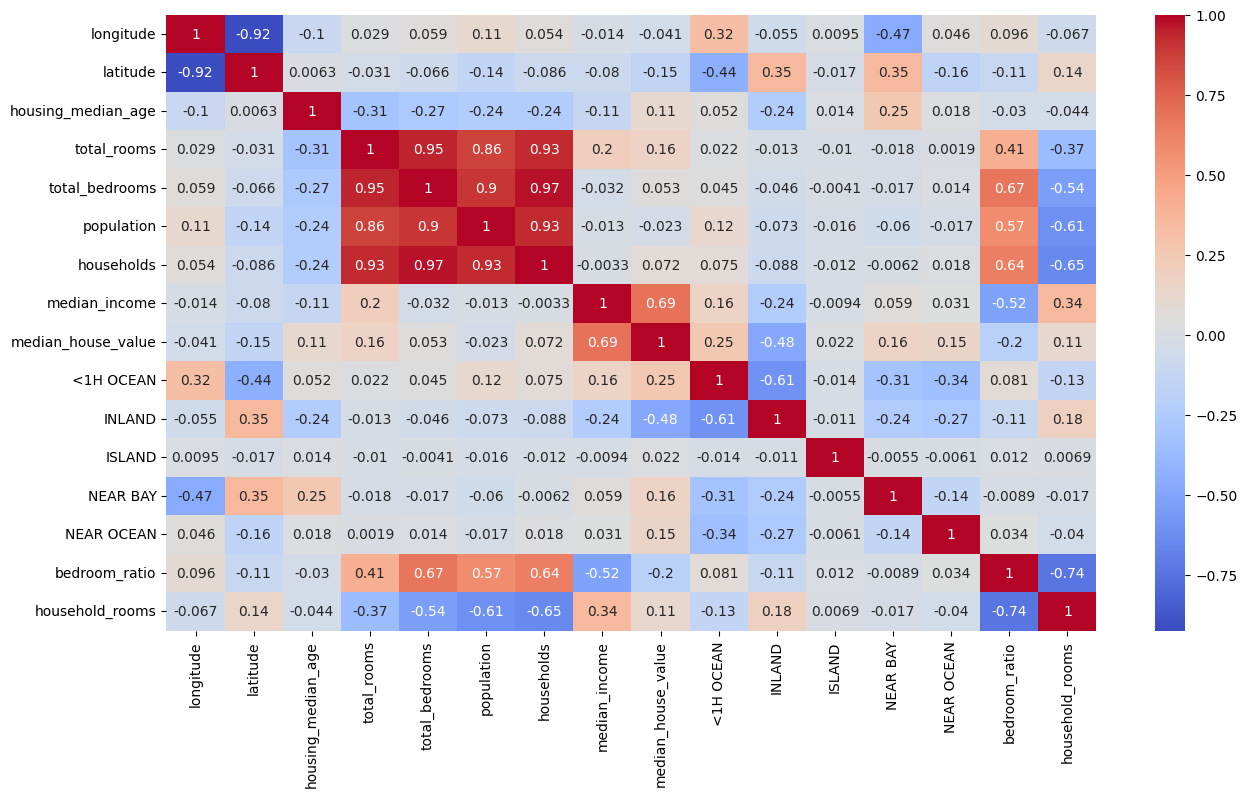

In [15]:
# create new variables
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

# Visualizing a correlation matrix of the train data using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")

### Linear Regression Model Training
We train a linear regression model on the training data with the new features created.


In [16]:
# Linear Regression :
# we'll need to split the data again with the new features
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

# import the linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### Test Data Preparation
We apply the same feature engineering steps to the test data to ensure consistency in the model's evaluation.


In [17]:
# we'll do the same for test data
test_data = X_test.join(y_test)
test_data = featuresEngineering(test_data,X_test,y_test)
test_data = replaceToDummies(test_data,'ocean_proximity')
# create new variables
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2597,-123.76,41.03,24.0,7.777793,6.338594,6.965080,6.028279,2.0644,79800.0,True,False,False,False,False,0.814961,1.290218
3405,-118.36,34.26,34.0,8.210124,6.352629,7.377134,6.343880,6.8380,378000.0,True,False,False,False,False,0.773756,1.294180
9054,-118.13,34.70,34.0,7.572503,6.216606,6.983790,6.102559,1.1296,93800.0,False,True,False,False,False,0.820945,1.240873
14291,-117.13,32.73,52.0,7.892452,6.324359,7.074963,6.287859,3.6058,213100.0,False,False,False,False,True,0.801317,1.255189
10587,-117.77,33.69,14.0,7.254178,5.921578,6.613384,5.826000,3.7988,184100.0,True,False,False,False,False,0.816299,1.245139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,-118.59,34.26,20.0,9.005405,7.031741,8.178358,6.961296,7.1670,357100.0,True,False,False,False,False,0.780836,1.293639
18398,-121.77,37.22,16.0,8.292298,6.293419,7.648740,6.320768,6.7287,299300.0,True,False,False,False,False,0.758948,1.311913
8126,-118.18,33.81,27.0,6.156979,4.890349,5.755742,4.574711,1.7500,154200.0,False,False,False,False,True,0.794277,1.345873
15225,-117.26,33.06,11.0,7.886457,5.866468,7.112327,5.905362,7.6832,319800.0,False,False,False,False,True,0.743866,1.335474


### Model Evaluation (Before Scaling)
We evaluate the linear regression model on the test data before applying any scaling. The score represents the model's accuracy.


In [24]:
# first test before scaling the data
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
score = reg.score(X_test, y_test)
print(f"The model's accuracy is: {score}")


The model's accuracy is -2160.5081413996118


/Users/bar_bettash/anaconda3/envs/Projects_PY3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Feature Scaling
We scale the features using `StandardScaler` to normalize the data, ensuring that each feature contributes equally to the model training. The model is then retrained and evaluated again.


In [26]:
# scaling the data
# IMORT FROM THE BEGINNING: from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# note that we need to fit only the train
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

reg.fit(X_train_s, y_train)
score = reg.score(X_test_s, y_test)
print(f"The model's accuracy after scaling is: {score}")

The model's accuracy after scaling is: 0.6605364681797512


### Hyperparameter Tuning with Grid Search
We use grid search with cross-validation to find the best hyperparameters for a `RandomForestRegressor`. This helps optimize the model's performance.


In [28]:
# Optimizing the model with decision tree
# IMORT FROM THE BEGINNING: from sklearn.ensemble import RandomForestRegressor
# defult trees are 100 according to sklearn docs
forest = RandomForestRegressor()
# train and tell the score again
forest.fit(X_train_s, y_train)
score = forest.score(X_test_s, y_test)
print(f"The Random Forest's accuracy is: {score}")

The Random Forest's accuracy is: 0.8073096569201204


In [21]:
# Optimizing more with Cross Validation
from sklearn.model_selection import GridSearchCV

# we'll define the forest again for preventing biasness
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [ 100, 200, 300],
    "min_samples_split": [ 2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
# fit the model
grid_search.fit(X_train_s, y_train)

# check for best estimators:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(n_estimators=300)

### Model Evaluation (Post-Tuning)
We evaluate the performance of the optimized random forest model on the test data. The score indicates how well the model generalizes to unseen data.


In [29]:
# check the result with the best estimators
score = best_forest.score(X_test_s, y_test)
print(f"The best forest model's accuracy is {score}")
# usually we should get better performance than in the forest.score
# if we get worst result, we can make some changes in param_grid

The best forest model's accuracy is 0.8094614517145665
